<br>
<img src="img/Capa.png">
<br>

# OBJETIVO
Realizar o processo de ETL (Extração, Transformação e Leitura) da fonte de dados do CAGED e elaborar uma hipótese para ser rejeitada ou não-rejeitada.

# METODOLOGIA
<br>
<img src="img/Metodologia.png">
<br>

# ETAPAS

<br>
<img src="img/Importação Bibliotecas.png">
<br>

Neste momento visualizamos a estrutura e conteúdo do arquivo, e identificamos a necessidade de alterar nomenclaturas das colunas, tipos de dados e valores de algumas variáveis.

**Importação das bibliotecas necessárias para leitura, transformação e visualização dos dados (ETL)**

In [3]:
#importa bibliotecas
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Leitura dos dados e importação em um dataframe**

In [4]:
data = pd.read_csv('Fonte IBGE/CAGEDEST_122018.txt', encoding = 'ISO-8859-1', decimal = ',', delimiter = ';')

**Visualizar o número de variáveis (linhas) e parâmetros (colunas) do dataframe**

In [5]:
data.shape

(2256752, 42)

In [6]:
data.index

RangeIndex(start=0, stop=2256752, step=1)

**Listagem das colunas existentes no dataframe**

In [7]:
data.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

**Verifica informações da estrutura dos parâmetros do dataframe**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           float64
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            float64
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm

**CONSIDERAÇÕES**

As correlações são muito baixas entre as variéveis

<br>
<img src="img/Transformação.png">
<br>

**Exclui as colunas que não serão utilizadas nas inferências**

In [9]:

columns = ['Competência Declarada',
           'Ano Declarado',
           'CBO 2002 Ocupação',
           'CNAE 1.0 Classe',
           'CNAE 2.0 Classe',
           'CNAE 2.0 Subclas',
           'Faixa Empr Início Jan',
           'IBGE Subsetor',           
           'Ind Aprendiz',
           'Ind Portador Defic',
           'Saldo Mov',
           'Tipo Estab',
           'Tipo Defic',
           'Tipo Mov Desagregado',
           'Bairros SP',
           'Bairros Fortaleza',
           'Bairros RJ',
           'Distritos SP',
           'Regiões Adm DF',
           'Mesorregião',
           'Microrregião',
           'Região Adm RJ',
           'Região Adm SP',
           'Região Corede',
           'Região Corede 04',
           'Região Gov SP',
           'Região Senac PR',
           'Região Senai PR',
           'Região Senai SP',
           'Sub-Região Senai PR',
           'Ind Trab Parcial',
           'Ind Trab Intermitente']
data.drop(columns, axis=1, inplace=True)

In [10]:
data.columns

Index(['Admitidos/Desligados', 'Município', 'Grau Instrução',
       'Qtd Hora Contrat', 'Idade', 'Raça Cor', 'Salário Mensal', 'Sexo',
       'Tempo Emprego', 'UF'],
      dtype='object')

**Alteração do nome das colunas para facilitar a análise**

In [11]:
data.rename(columns={'Admitidos/Desligados': 'admitidos_desligados', 
                     'Município': 'municipio',
                     'Grau Instrução' : 'grau_instrucao',
                     'Qtd Hora Contrat' : 'qtd_hora_contrat',
                     'Idade' : 'idade',
                     'Raça Cor' : 'raca_cor',
                     'Salário Mensal':'salario_mensal',
                     'Sexo':'sexo',
                     'Tempo Emprego':'tempo_emprego',
                     'UF':'uf'}, inplace=True)

**Altera os valores numéricos para as "Descrições" na coluna "estados" e exibe o resultado**

In [12]:
siglas = pd.read_csv('Fonte IBGE/siglas.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, siglas, on ='uf', how='outer')

def remove_repetidos(lista):
    l = []
    for i in lista:
       if i not in l:
            l.append(i)
    l.sort()
    return l

lista = data['sigla']

l_siglas = remove_repetidos(lista)

l_siglas

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

**Altera os valores numéricos para as "Descrições" na coluna "grau_instrucao" e exibe o resultado**

In [13]:
dic_grau = pd.read_csv('Fonte IBGE/dic_grau_instrucao.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, dic_grau, on ='grau_instrucao', how='left')

def remove_repetidos(lista):
    l = []
    for i in lista:
       if i not in l:
            l.append(i)
    l.sort()
    return l

lista = data['desc_instrucao']

l_grau_inst = remove_repetidos(lista)

l_grau_inst

['5ª Completo Fundamental',
 '6ª a 9ª Fundamental',
 'Analfabeto',
 'Até 5ª Incompleto',
 'Fundamental Completo',
 'Médio Completo',
 'Médio Incompleto',
 'Superior Completo',
 'Superior Incompleto']

**Altera os valores numéricos para as "Descrições" na coluna "raca_cor" e exibe o resultado**

In [14]:
dic_raca = pd.read_csv('Fonte IBGE/dic_raca.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, dic_raca, on ='raca_cor', how='left')

def remove_repetidos(lista):
    l = []
    for i in lista:
       if i not in l:
            l.append(i)
    l.sort()
    return l

lista = data['desc_raca']

l_raca_cor = remove_repetidos(lista)

l_raca_cor

['AMARELA', 'BRANCA', 'INDIGENA', 'NAO IDENT', 'PARDA', 'PRETA']

**Altera os valores numéricos para as "Descrições" na coluna "sexo" e exibe o resultado**

In [15]:
dic_sexo = pd.read_csv('Fonte IBGE/dic_sexo.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, dic_sexo, on ='sexo', how='left')

def remove_repetidos(lista):
    l = []
    for i in lista:
       if i not in l:
            l.append(i)
    l.sort()
    return l

lista = data['desc_sexo']

l_sexo = remove_repetidos(lista)

l_sexo

['FEMININO', 'MASCULINO']

**Verifica se o Salário Mensal possui valores NaN, nulos ou negativos**

In [16]:
qtd_nan = data['salario_mensal'].isna().sum()
qtd_null = data['salario_mensal'].isnull().sum()
qtd_zeros = data[data['salario_mensal'] < 0]['salario_mensal'].count()
print("Qtd Valores NaN:",qtd_nan)
print("Qtd Valores Nulos",qtd_null)
print("Qtd Valores Negativos",qtd_zeros)

Qtd Valores NaN: 0
Qtd Valores Nulos 0
Qtd Valores Negativos 0


**Mostrar o tipo de dados**

In [17]:
data.salario_mensal.dtypes

dtype('float64')

**Calcular média, variância e desvio padrão da variável Salário Mensal**

In [18]:
n_salario = len(data.salario_mensal)
mean_salario = data.salario_mensal.mean()
std_amostral_salario = np.std(data.salario_mensal, ddof=1) 
var_amostral_salario = std_amostral_salario**2

print('Registros:',n_salario)
print('Média:',round(mean_salario,2))
print('Desvio-Padrão:',round(std_amostral_salario,2))
print('Varância:',round(var_amostral_salario,2))

Registros: 2256752
Média: 1627.24
Desvio-Padrão: 2097.52
Varância: 4399592.44


**CONSIDERAÇÕES**

a. Desvio padrão amostral e populacional quase idênticos, dado que n é muito alto

b. Outro metodo, porém calcula dp populacional: data.salario_mensal.describe()

**Plota o histograma para variável "salario_mesal"**

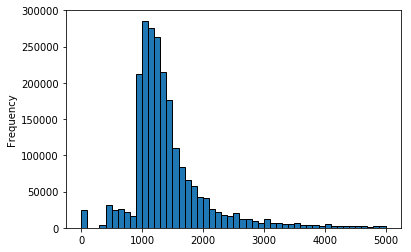

In [19]:
data.salario_mensal.plot.hist(bins=50, edgecolor='black', range=(0,5000))

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro**

In [20]:
stats.shapiro(data.salario_mensal)

(0.2637892961502075, 0.0)

**Normaliza a curva utilizando LOG (numpy.log) e salva em uma nova coluna "salario_log"**

Observação: Soma +1 no salário para evitar erros de log = 0 o que tendem ao infinito negativo

In [21]:
data["salario_log"] = np.log(data.salario_mensal+1)

**Plota o histograma para verificar a distribuicao depois da normalização**

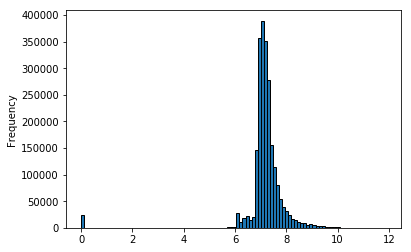

In [22]:
data.salario_log.plot.hist(bins=100, edgecolor='black')

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro para salario_log (precisa se aproximar de (1,0))**

In [23]:
stats.shapiro(data.salario_log)

(0.5028517246246338, 0.0)

**Calcula a padronização Z**

In [24]:
data["salario_padrao"] = ( data.salario_log - data.salario_log.mean() ) / data.salario_log.std()

**Plota o histograma do salario padronizado em Z**

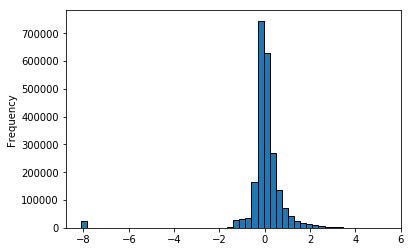

In [25]:
data.salario_padrao.plot.hist(bins=50, edgecolor='black')

In [26]:
#mu = np.mean(data.salario_padrao) 
mu = data.salario_padrao.mean()
std = data.salario_padrao.std()

mu, std

(5.869206605173686e-12, 0.9999999999999915)

In [27]:
limite_inferior = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
limite_superior = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]

print (limite_inferior, '<-- desvio padrão -->', limite_superior)

-1.959963984534168 <-- desvio padrão --> 1.9599639845459067


In [28]:
sal_sig_sup = data[data.salario_padrao>1.96].shape[0]/data.salario_padrao.shape[0]
sal_sig_inf = data[data.salario_padrao<-1.96].shape[0]/data.salario_padrao.shape[0]

v1 = data[data.salario_padrao>1.96].shape[0]
v2 = data[data.salario_padrao<-1.96].shape[0]

print ('Estatisticamente Significativo abaixo da média:',sal_sig_inf*100,"%", "(", v1 ,")")
print ('Estatisticamente Significativo acimada média:',sal_sig_sup*100, "%", "(", v2,")")
print ('Total:',(sal_sig_inf + sal_sig_sup)*100, "%", "(", v1 + v2, ")")

Estatisticamente Significativo abaixo da média: 1.0743316057767978 % ( 29785 )
Estatisticamente Significativo acimada média: 1.3198171531475325 % ( 24245 )
Total: 2.39414875892433 % ( 54030 )


**Plota todos os gráficos com a curva de densidade de probabilidade**

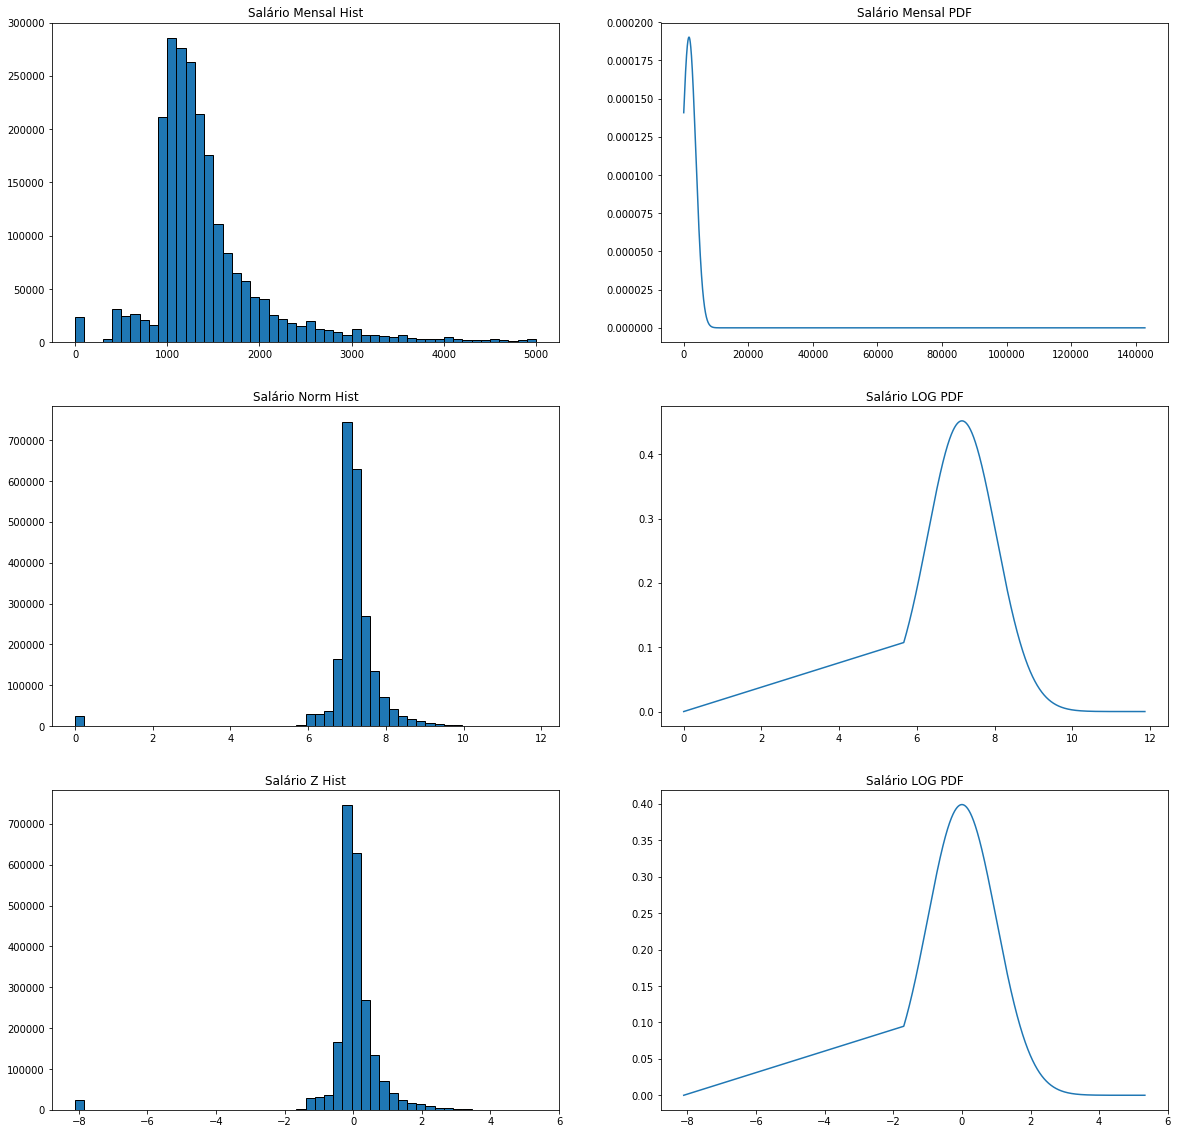

In [29]:
fig, ax = plt.subplots(3, 2,figsize=(20,20)) #cria a matriz de plotagem com 6 graficos

#plota o histograma do salario mensal
x = data.salario_mensal
ax[0,0].hist(x, bins=50, edgecolor='black', range=(0,5000))
ax[0,0].set_title("Salário Mensal Hist")

#plota a curva de densidade do salario mensal
x = data.salario_mensal.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[0,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[0,1].set_title("Salário Mensal PDF")

#plota o histograma do salario normalizado
x = data.salario_log
ax[1,0].hist(x, edgecolor='black', bins=50)
ax[1,0].set_title("Salário Norm Hist")

#plota a curva de densidade do salario mensal
x = data.salario_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[1,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[1,1].set_title("Salário LOG PDF")

#plota o histograma do salario Z
x = data.salario_padrao
ax[2,0].hist(x, edgecolor='black', bins=50)
ax[2,0].set_title("Salário Z Hist")

#plota a curva de densidade do salario mensal
x = data.salario_padrao.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[2,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[2,1].set_title("Salário LOG PDF")

plt.show()

**CONSIDERAÇÕES**

Verificamos que a tratativa da base de dados utilizando log normalizou a série e constatamos que 2,4% (54.030) da população possuem salário mensal estatisticamente significativo.

<br>
<img src="img/Exploração_Idade.png">
<br>

**Analisa o tipo de dado da variával "Idade"**

In [30]:
data.salario_mensal.dtypes

dtype('float64')

**Calcula a média, variância e desvio**

In [31]:
n_idade = len(data.idade)
mean_idade = data.idade.mean()
std_amostral_idade = np.std(data.idade, ddof=1) 
var_amostral_idade = std_amostral_idade**2

print('Registros:',n_idade)
print('Média:',mean_idade)
print('Desvio-Padrão:',std_amostral_idade)
print('Varância:',var_amostral_idade)

Registros: 2256752
Média: 32.314226374896315
Desvio-Padrão: 10.960189422168419
Varância: 120.1257521698125


**Plota o histograma**

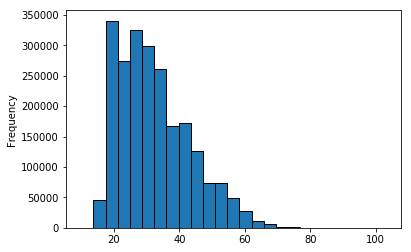

In [32]:
data.idade.plot.hist(bins=25, edgecolor='black')

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro**

In [33]:
stats.shapiro(data.idade)

(0.9411314725875854, 0.0)

**Normaliza a curva utilizando LOG (numpy.log) e salva em uma nova coluna: "idade_log"**

In [34]:
data["idade_log"] = np.log(data.idade)

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro para idade_log (precisa de aproximar de (1,0))**

In [35]:
stats.shapiro(data.idade_log)

(0.9819164276123047, 0.0)

**Plota o histograma para variável "idade_log"**

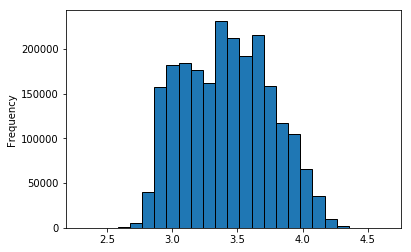

In [36]:
data.idade_log.plot.hist(bins=25,edgecolor='black')

**Calcula a padronização Z**

In [37]:
data["idade_padrao"] = ( data.idade_log - data.idade_log.mean() ) / data.idade_log.std()

**Plotar dispersão "salario_log" vs "idade_log" (Apenas os 10000 primeiros registros)**

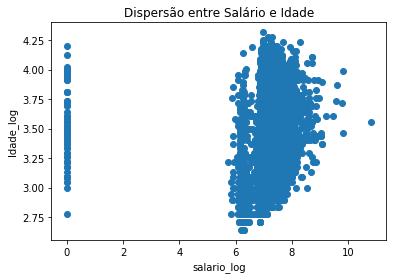

In [38]:
plt.plot(data.salario_log.head(10000), data.idade_log.head(10000),'o')
plt.title('Dispersão entre Salário e Idade')
plt.xlabel('salario_log')
plt.ylabel('Idade_log')
plt.show()

**Mostra a correlação entre "salario_log" e "idade_log"**

In [39]:
data[['salario_log',
      'idade_log',
    ]].corr(method ='pearson')

,salario_log,idade_log
salario_log,1.000000,0.153457
idade_log,0.153457,1.000000


**CONSIDERAÇÕES**

A correlação é baixa entre idade e salário e não podemos inferir que maior idade justifica aumento salarial.

<br>
<img src="img/Exploração_Instrução.png">
<br>

**Analisa o tipo de dado da variával "Grau de Instrução"**

In [40]:
data.grau_instrucao.dtypes

dtype('int64')

**Calcula a média, variância e desvio padrão**

In [41]:
n_grau_instrucao = len(data.grau_instrucao)
mean_grau_instrucao = data.grau_instrucao.mean()
std_amostral_grau_instrucao = np.std(data.grau_instrucao, ddof=1) 
var_amostral_grau_instrucao = std_amostral_grau_instrucao**2

print('Registros:',n_grau_instrucao)
print('Média:',mean_grau_instrucao)
print('Desvio-Padrão:',std_amostral_grau_instrucao)
print('Varância:',var_amostral_grau_instrucao)

Registros: 2256752
Média: 6.595547494806696
Desvio-Padrão: 1.5485383327955375
Varância: 2.397970968137183


**Plota quantidade por grau_instrucao**

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro**

In [42]:
stats.shapiro(data.grau_instrucao)

(0.8100849986076355, 0.0)

**Normaliza a curva utilizando LOG (numpy.log) e salva em uma nova coluna "grau_instrucao_log"**

In [43]:
data["grau_instrucao_log"] = np.log(data.grau_instrucao)

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro para "grau_instrucao_log"**

In [44]:
stats.shapiro(data.grau_instrucao_log)

(0.6717902421951294, 0.0)

**Calcula a padronização Z**

In [45]:
data["grau_instrucao_padrao"] = ( data.grau_instrucao - data.grau_instrucao.mean() ) / data.grau_instrucao.std()

**Plotar dispersão salario_log vs grau_instrucao (Apenas os 10000 primeiros registros)**

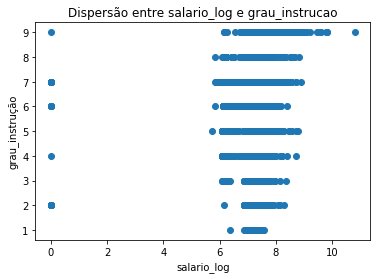

In [46]:
plt.plot(data.salario_log.head(10000), data.grau_instrucao.head(10000),'o')
plt.title('Dispersão entre salario_log e grau_instrucao')
plt.xlabel('salario_log')
plt.ylabel('grau_instrução')
plt.show()

**Mostra a correlação entre salario_log e grau_instrucao**

In [47]:
data[['salario_log',
      'grau_instrucao',
    ]].corr(method ='pearson')

,salario_log,grau_instrucao
salario_log,1.000000,0.110415
grau_instrucao,0.110415,1.000000


**CONSIDERAÇÕES**

A correlação é baixa entre grau de instrução e salário e não podemos inferir que o mais qualificado justifica aumento salarial.

<br>
<img src="img/Exploração_Sexo.png">
<br>

**Analisa o tipo de dado da variával "Sexo"**

In [48]:
data.sexo.dtypes

dtype('int64')

**Calcula a média, variância e desvio padrão**

In [49]:
n_sexo = len(data.sexo)
mean_sexo = data.sexo.mean()
std_amostral_sexo = np.std(data.sexo, ddof=1) 
var_amostral_sexo = std_amostral_sexo**2

print('Registros:',n_sexo)
print('Média:',mean_sexo)
print('Desvio-Padrão:',std_amostral_sexo)
print('Varância:',var_amostral_sexo)

Registros: 2256752
Média: 1.4137029678050579
Desvio-Padrão: 0.4924966291446393
Varância: 0.24255292971883238


**Plota o histograma**

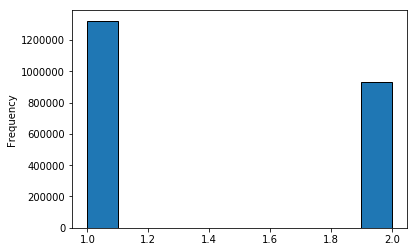

In [50]:
data.sexo.plot.hist(edgecolor='black')

**Plotar dispersão salario_log vs sexo (Apenas os 10000 primeiros registros)**

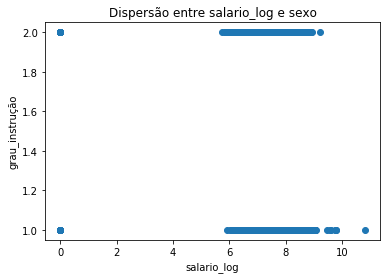

In [51]:
plt.plot(data.salario_log.head(10000), data.sexo.head(10000),'o')
plt.title('Dispersão entre salario_log e sexo')
plt.xlabel('salario_log')
plt.ylabel('grau_instrução')
plt.show()

**Correlação entre salario_log e sexo**

In [52]:
data[['salario_log',
      'sexo',
    ]].corr(method ='pearson')

,salario_log,sexo
salario_log,1.000000,-0.063652
sexo,-0.063652,1.000000


**CONSIDERAÇÕES**

A correlação é baixa entre sexo e salário e não podemos inferir que um sexo específico justifica aumento salarial.

<br>
<img src="img/Exploração_RacaCor.png">
<br>

**Analisa o tipo de dado da variável raça cor**

In [53]:
data.raca_cor.dtypes

dtype('int64')

**Calcula a média, variância e desvio padrão**

In [54]:
n_raca_cor = len(data.raca_cor)
mean_raca_cor = data.raca_cor.mean()
std_amostral_raca_cor = np.std(data.raca_cor, ddof=1) 
var_amostral_raca_cor = std_amostral_raca_cor**2

print('Registros:',n_raca_cor)
print('Média:',mean_raca_cor)
print('Desvio-Padrão:',std_amostral_raca_cor)
print('Varância:',var_amostral_raca_cor)

Registros: 2256752
Média: 5.254455961488015
Desvio-Padrão: 3.0665596516038414
Varância: 9.403788096844673


**Plota o histograma**

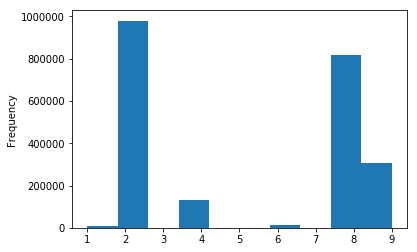

In [55]:
data.raca_cor.plot.hist()



**Plota a dispersão "salario_log" vs "sexo" (Apenas os 10000 primeiros registros)**

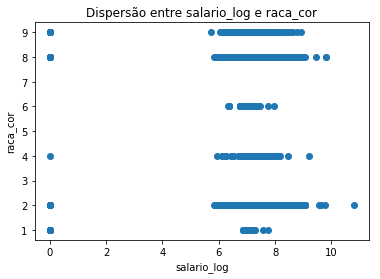

In [56]:
plt.plot(data.salario_log.head(10000), data.raca_cor.head(10000),'o')
plt.title('Dispersão entre salario_log e raca_cor')
plt.xlabel('salario_log')
plt.ylabel('raca_cor')
plt.show()

**Mostra correlação entre salario_log e raca_cor**

In [57]:
data[['salario_log',
      'raca_cor',
    ]].corr(method ='pearson')

,salario_log,raca_cor
salario_log,1.00000,-0.06586
raca_cor,-0.06586,1.00000


**CONCLUSÕES**

A correlação é baixa entre raça_cor e salário e não podemos inferir que determinada raça_cor específica justifique o maior valor salarial.

<br>
<img src="img/Hipotese.png">
<br>

**Nossa porposta é testar a hipótese de que dentro da base do CAGED as Mulheres entre 18-24 anos têm maior salário mensal que os homens da mesma faixa etária. Para desenvolver este teste consideramos apenas os trabalhadores da base cujo salário é maior que ZERO.**

**PASSOS**

**Para avaliar os homens entre 18 e 24 anos, começamos criando um novo dataframe utilizando uma mascará do DataFrame principal.**

In [59]:
filter = ((data.idade > 17) & (data.idade < 25) & (data.sexo == 1))
df_homem = data.loc[filter]

**Em nosso novo dataframe só aparece desc_sexo = MASCULINO.**

In [74]:
df_homem.head() 

,admitidos_desligados,municipio,grau_instrucao,qtd_hora_contrat,idade,raca_cor,salario_mensal,sexo,tempo_emprego,uf,...,desc_instrucao,desc_raca,desc_sexo,salario_log,salario_padrao,idade_log,idade_padrao,grau_instrucao_log,grau_instrucao_padrao,salary_logz
0,1,500215,6,40,24,8,954.0,1,0.0,50,...,Médio Incompleto,PARDA,MASCULINO,6.861711,-0.338373,3.178054,-0.734573,1.791759,-0.384587,-0.201818
6,1,500460,2,1,22,8,0.0,1,0.0,50,...,Até 5ª Incompleto,PARDA,MASCULINO,0.000000,-8.108356,3.091042,-0.998190,0.693147,-2.967668,-9.174464
11,1,500660,7,44,22,8,1061.0,1,0.0,50,...,Médio Completo,PARDA,MASCULINO,6.967909,-0.218118,3.091042,-0.998190,1.945910,0.261183,-0.062949
13,1,500270,6,44,20,2,1061.0,1,0.0,50,...,Médio Incompleto,BRANCA,MASCULINO,6.967909,-0.218118,2.995732,-1.286949,1.791759,-0.384587,-0.062949
16,1,500660,5,44,22,9,1061.0,1,0.0,50,...,Fundamental Completo,NAO IDENT,MASCULINO,6.967909,-0.218118,3.091042,-0.998190,1.609438,-1.030357,-0.062949


**Podemos ver que não há valores nulos.**

In [75]:
df_homem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338734 entries, 0 to 2256750
Data columns (total 22 columns):
admitidos_desligados     338734 non-null int64
municipio                338734 non-null int64
grau_instrucao           338734 non-null int64
qtd_hora_contrat         338734 non-null int64
idade                    338734 non-null int64
raca_cor                 338734 non-null int64
salario_mensal           338734 non-null float64
sexo                     338734 non-null int64
tempo_emprego            338734 non-null float64
uf                       338734 non-null int64
estado                   338734 non-null object
sigla                    338734 non-null object
desc_instrucao           338734 non-null object
desc_raca                338734 non-null object
desc_sexo                338734 non-null object
salario_log              338734 non-null float64
salario_padrao           338734 non-null float64
idade_log                338734 non-null float64
idade_padrao             33

**Padronizamos novamente**

In [66]:
df_homem['salary_logz'] = (df_homem.salario_log - df_homem.salario_log.mean())/df_homem.salario_log.std()

In [76]:
df_homem.head(10)

,admitidos_desligados,municipio,grau_instrucao,qtd_hora_contrat,idade,raca_cor,salario_mensal,sexo,tempo_emprego,uf,...,desc_instrucao,desc_raca,desc_sexo,salario_log,salario_padrao,idade_log,idade_padrao,grau_instrucao_log,grau_instrucao_padrao,salary_logz
0,1,500215,6,40,24,8,954.0,1,0.0,50,...,Médio Incompleto,PARDA,MASCULINO,6.861711,-0.338373,3.178054,-0.734573,1.791759,-0.384587,-0.201818
6,1,500460,2,1,22,8,0.0,1,0.0,50,...,Até 5ª Incompleto,PARDA,MASCULINO,0.000000,-8.108356,3.091042,-0.998190,0.693147,-2.967668,-9.174464
11,1,500660,7,44,22,8,1061.0,1,0.0,50,...,Médio Completo,PARDA,MASCULINO,6.967909,-0.218118,3.091042,-0.998190,1.945910,0.261183,-0.062949
13,1,500270,6,44,20,2,1061.0,1,0.0,50,...,Médio Incompleto,BRANCA,MASCULINO,6.967909,-0.218118,2.995732,-1.286949,1.791759,-0.384587,-0.062949
16,1,500660,5,44,22,9,1061.0,1,0.0,50,...,Fundamental Completo,NAO IDENT,MASCULINO,6.967909,-0.218118,3.091042,-0.998190,1.609438,-1.030357,-0.062949
17,1,500800,5,44,18,8,1700.0,1,0.0,50,...,Fundamental Completo,PARDA,MASCULINO,7.438972,0.315298,2.890372,-1.606157,1.609438,-1.030357,0.553031
18,1,500124,4,44,23,2,1026.0,1,0.0,50,...,6ª a 9ª Fundamental,BRANCA,MASCULINO,6.934397,-0.256066,3.135494,-0.863515,1.386294,-1.676127,-0.106771
25,1,500330,5,44,18,8,1200.0,1,0.0,50,...,Fundamental Completo,PARDA,MASCULINO,7.090910,-0.078836,2.890372,-1.606157,1.609438,-1.030357,0.097891
26,1,500660,6,44,24,8,991.0,1,0.0,50,...,Médio Incompleto,PARDA,MASCULINO,6.899723,-0.295330,3.178054,-0.734573,1.791759,-0.384587,-0.152112
27,1,500660,7,44,21,8,1061.0,1,0.0,50,...,Médio Completo,PARDA,MASCULINO,6.967909,-0.218118,3.044522,-1.139130,1.945910,0.261183,-0.062949


**Plotamos o gráfico padronizado e normalizado**

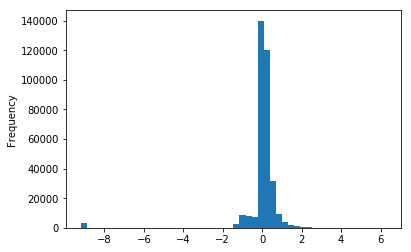

In [77]:
df_homem.salary_logz.plot.hist(bins=50)

**Aplicamos o teste de Saphiro para verificar a normalidade**

In [78]:
stats.shapiro(df_homem.salary_logz) 

(0.38281238079071045, 0.0)

In [79]:
x = df_homem.salary_logz
mu = x.mean()
std = df_homem.salary_logz.std()
mu, std

(-2.738437974291378e-12, 0.9999999999997862)

**Verificando os limites inferiores e superiores, observamos que nossa padronização ocorreu dentro do esperado.**

In [80]:
h_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[0]
h_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[1]

h_limite_inferior, h_limite_superior

(-1.9599639845423735, 1.9599639845368966)

**Trabalhamos da mesma forma com os dados das mulheres e iniciamos criando um novo DataFrame**

In [83]:
filter2 = ((data.idade > 17) & (data.idade < 25) & (data.sexo == 2))
df_mulher = data.loc[filter2]

**Em nosso novo dataframe só aparece desc_sexo = FEMININO.**

In [84]:
df_mulher.head()

,admitidos_desligados,municipio,grau_instrucao,qtd_hora_contrat,idade,raca_cor,salario_mensal,sexo,tempo_emprego,uf,...,sigla,desc_instrucao,desc_raca,desc_sexo,salario_log,salario_padrao,idade_log,idade_padrao,grau_instrucao_log,grau_instrucao_padrao
39,1,500240,7,44,20,2,1179.0,2,0.0,50,...,MS,Médio Completo,BRANCA,FEMININO,7.073270,-0.098812,2.995732,-1.286949,1.945910,0.261183
40,1,500830,7,40,24,8,2898.0,2,0.0,50,...,MS,Médio Completo,PARDA,FEMININO,7.972121,0.919019,3.178054,-0.734573,1.945910,0.261183
60,1,500580,6,44,20,8,1061.0,2,0.0,50,...,MS,Médio Incompleto,PARDA,FEMININO,6.967909,-0.218118,2.995732,-1.286949,1.791759,-0.384587
69,1,500710,6,24,20,2,531.0,2,0.0,50,...,MS,Médio Incompleto,BRANCA,FEMININO,6.276643,-1.000886,2.995732,-1.286949,1.791759,-0.384587
77,1,500540,4,44,21,8,1061.0,2,0.0,50,...,MS,6ª a 9ª Fundamental,PARDA,FEMININO,6.967909,-0.218118,3.044522,-1.139130,1.386294,-1.676127


In [85]:
df_mulher['salary_logz'] = (df_mulher.salario_log - df_mulher.salario_log.mean())/df_mulher.salario_log.std()

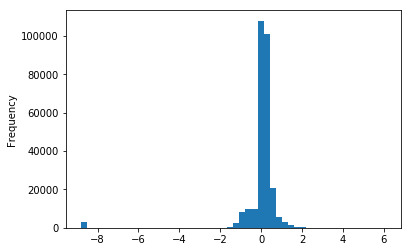

In [86]:
df_mulher.salary_logz.plot.hist(bins=50)

In [87]:
stats.shapiro(df_mulher['salary_logz'])

(0.3814220428466797, 0.0)

In [88]:
x1 = df_mulher.salary_logz
mu1 = x1.mean()
std1 = df_mulher.salary_logz.std()
mu1, std1

(-8.792944022229647e-13, 1.0000000000001015)

In [89]:
m_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[0]
m_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[1]

m_limite_inferior, m_limite_superior

(-1.9599639845411323, 1.9599639845393737)

In [91]:
#Para plotar o gráfico, voltaremos um passo adiante e trabalharemos com o salário mensal em forma de log,
# Mas não padronizado

x = df_homem.salario_log
mu = x.mean()
std = df_homem.salario_log.std()
mu, std

h_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[0]
h_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[1]

h_limite_inferior, h_limite_superior

(5.5171923388026505, 8.514904964482833)

In [93]:
x1 = df_mulher.salario_log
mu1 = x1.mean()
std1 = df_mulher.salario_log.std()
mu1, std1

m_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[0]
m_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[1]

m_limite_inferior, m_limite_superior

(5.419035781392624, 8.520974839282143)

**Verificamos que na escala logarítimica, os limites inferiores e superiores são muito parecidos**

**Verificamos também que na escala logarítimica, as médias são parecidas**

In [96]:
df_homem.salario_log.mean(), df_mulher.salario_log.mean()

(7.016048651642742, 6.970005310337384)

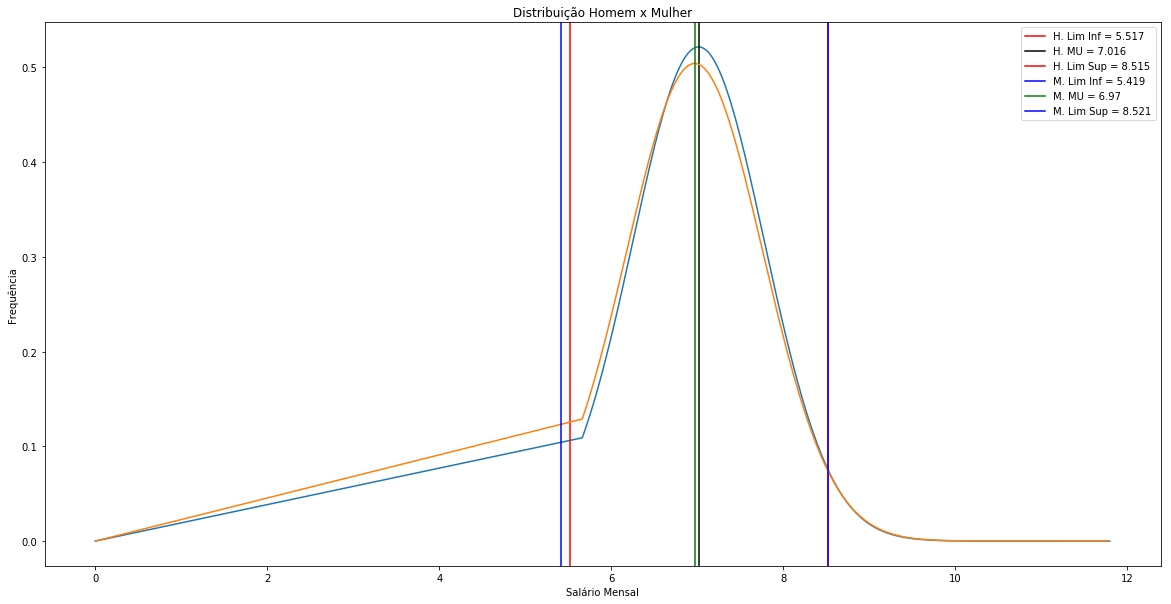

In [98]:
#PLOTA TODOS OS GRAFICOS :D

fig, ax = plt.subplots(1, 1, figsize = (20,10)) #cria a matriz de plotagem com 6 graficos


#plota a curva de densidade do salario mensal
x = df_homem.salario_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, std))
ax.set(xlabel='Salário Mensal', ylabel='Frequência')

# x coordinates for the lines
xcoords = [round(h_limite_inferior,3),round(mu,3),round(h_limite_superior,3)]
# colors for the lines
colors = ['r','k','r','b']

plt.axvline(x=xcoords[0], label='H. Lim Inf = {}'.format(xcoords[0]), c='r')
plt.axvline(x=xcoords[1], label='H. MU = {}'.format(xcoords[1]), c='k')
plt.axvline(x=xcoords[2], label='H. Lim Sup = {}'.format(xcoords[2]), c='r')


#for xc,c in zip(xcoords,colors):
#    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

#plota a curva de densidade do salario mensal
x1 = df_mulher.salario_log.sort_values()
# calculando a média
mu1 = x1.mean()
# calculando o desvio padrão populacional
sigma1 = x1.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x1, stats.norm.pdf(x1, mu1, std1))
ax.set_title("Distribuição Homem x Mulher")

# x coordinates for the lines
xcoords = [round(m_limite_inferior,3),round(mu1,3),round(m_limite_superior,3)]
# colors for the lines
colors = ['b','g','b','k']

plt.axvline(x=xcoords[0], label='M. Lim Inf = {}'.format(xcoords[0]), c='b')
plt.axvline(x=xcoords[1], label='M. MU = {}'.format(xcoords[1]), c='g')
plt.axvline(x=xcoords[2], label='M. Lim Sup = {}'.format(xcoords[2]), c='b')

#for xc,c in zip(xcoords,colors):
#    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

plt.legend()
plt.show()

**CONCLUSÃO DA HIPÓTESE**

Homens e mulheres possuem um desvio padrão similar. 
Plotando um gráfico sobre o outro, verificamos que não há diferença significativa em seus limites superiores para inferirmos que mulheres 
ganham mais que os homens.

**RESULTADO DA ANÁLISE:**

**HIPÓTESE NÃO-REJEITADA, OU SEJA, MULHERES ENTRE 18-24 ANOS TÊM MAIOR SALÁRIO MENSAL QUE OS HOMENS DA MESMA FAIXA ETÁRIA**

<br>
<img src="img/Correlações.png">
<br>

**Exibe a correlação entre variáveis numéricas**

In [120]:
data[['salario_log',
      'idade_log',
      'admitidos_desligados',
      'grau_instrucao',
      'qtd_hora_contrat',
      'raca_cor',
      'sexo',
      'tempo_emprego'
     ]].corr(method ='pearson')

,salario_log,idade_log,admitidos_desligados,grau_instrucao,qtd_hora_contrat,raca_cor,sexo,tempo_emprego
salario_log,1.000000,0.153457,0.018844,0.110415,0.328399,-0.065860,-0.063652,0.126529
idade_log,0.153457,1.000000,0.110425,-0.089976,0.101038,-0.029238,-0.064082,0.252897
admitidos_desligados,0.018844,0.110425,1.000000,-0.031150,-0.058134,-0.039206,-0.013509,0.332575
grau_instrucao,0.110415,-0.089976,-0.031150,1.000000,-0.155670,-0.062680,0.205090,0.041182
qtd_hora_contrat,0.328399,0.101038,-0.058134,-0.155670,1.000000,0.049328,-0.114000,-0.063910
raca_cor,-0.065860,-0.029238,-0.039206,-0.062680,0.049328,1.000000,-0.059259,-0.092636
sexo,-0.063652,-0.064082,-0.013509,0.205090,-0.114000,-0.059259,1.000000,0.009666
tempo_emprego,0.126529,0.252897,0.332575,0.041182,-0.063910,-0.092636,0.009666,1.000000


In [92]:
data.corr(method ='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,qtd_hora_contrat,ibge_subsetor,idade,ind_aprendiz,ind_portador_defic,raca_cor,salario_mensal,salario_mov,sexo,tempo_emprego,tipo_estab,tipo_defic,tipo_mov_desagregado,uf,regioes_adm_df,mesoregiao,microregiao,ind_trab_parcial,ind_trab_intermitente,salario_log,salario_padrao,idade_log,idade_padrao,grau_instrucao_log,grau_instrucao_padrao
admitidos_desligados,1.0,nan,0.0097,nan,0.014,-0.054,-0.046,-0.046,0.058,-0.031,-0.058,-0.0054,0.11,0.054,-0.006,-0.039,0.045,-1.0,-0.014,0.33,0.035,-0.0034,0.25,0.0096,0.0018,0.0095,0.0096,0.0041,-0.047,0.019,0.019,0.11,0.11,-0.043,-0.031
competencia_declarada,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
municipio,0.0097,nan,1.0,nan,0.01,-0.028,-0.024,-0.024,-0.0095,-0.013,0.00066,0.016,-0.013,0.0038,-0.0072,-0.15,0.026,-0.0097,0.027,-0.0056,0.0096,-0.0027,-0.016,1.0,0.02,1.0,1.0,-0.025,-0.013,0.056,0.056,-0.02,-0.02,-0.0075,-0.013
ano_declarado,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cbo_2002_ocupacao,0.014,nan,0.01,nan,1.0,-0.43,-0.44,-0.44,-0.026,-0.43,0.22,-0.29,0.05,-0.014,-0.0066,0.062,-0.17,-0.014,-0.34,-0.084,0.1,-0.003,-0.0015,0.011,-0.0011,0.011,0.011,-0.039,0.011,-0.054,-0.054,0.046,0.046,-0.36,-0.43
cnae_10_classe,-0.054,nan,-0.028,nan,-0.43,1.0,0.96,0.96,0.047,0.34,-0.2,0.36,0.021,-0.025,0.0026,-0.02,0.048,0.054,0.21,0.031,-0.35,0.0011,-0.034,-0.029,0.0012,-0.028,-0.029,0.041,0.0042,0.011,0.011,0.025,0.025,0.32,0.34
cnae_20_classe,-0.046,nan,-0.024,nan,-0.44,0.96,1.0,1.0,0.071,0.33,-0.22,0.41,0.033,-0.03,-0.00024,-0.02,0.043,0.046,0.23,0.034,-0.32,-0.0013,-0.023,-0.025,0.0013,-0.024,-0.025,0.042,0.0024,-0.00084,-0.00084,0.037,0.037,0.31,0.33
cnae_20_subclas,-0.046,nan,-0.024,nan,-0.44,0.96,1.0,1.0,0.071,0.33,-0.22,0.41,0.033,-0.03,-0.00024,-0.02,0.043,0.046,0.23,0.034,-0.32,-0.0013,-0.023,-0.025,0.0013,-0.024,-0.025,0.042,0.0024,-0.00084,-0.00084,0.037,0.037,0.31,0.33
faixa_empr_ini_jan,0.058,nan,-0.0095,nan,-0.026,0.047,0.071,0.071,1.0,-0.013,-0.14,-0.026,0.012,0.15,0.056,0.0015,0.091,-0.058,-0.022,0.097,-0.14,0.044,0.056,-0.01,-0.0065,-0.01,-0.01,-0.0094,-0.0047,0.053,0.053,0.0065,0.0065,-0.026,-0.013
grau_instrucao,-0.031,nan,-0.013,nan,-0.43,0.34,0.33,0.33,-0.013,1.0,-0.16,0.03,-0.11,-0.04,-0.0038,-0.063,0.18,0.031,0.21,0.041,-0.21,-0.007,-0.01,-0.014,0.0011,-0.013,-0.014,0.028,0.0018,0.11,0.11,-0.09,-0.09,0.97,1.0
